In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles

In [5]:
df = pd.read_csv('../../dataset/imigrantes_canada.csv')
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# para inspecionar o DataFrame (procurar por colunas, tipos de dados, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [7]:
# É conveniente usar como index a coluna 'pais' para facilitar as analises
# parametro inplace=True altera o DataFrame original
df.set_index('País', inplace=True)
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [10]:
# É interessante analisar a coluna 'Ano' como datetime e para facilitar é conveniente criar uma lista com os anos
# metodo map aplica a funcao str() em cada elemento do range
anos = list(map(str, range(1980, 2014 )))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [11]:
# Para facilitar a analise para apenas um pais alvo, pode-se utilizar o metodo loc, que permite selecionar rotulos especificos dentro do dataframe
brasil = df.loc['Brasil', anos]
brasil.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brasil, dtype: object

In [12]:
# Com os dados selecionado pode-se criar um novo dataframe.
# O metodo tolist() converte a Series em uma lista
# ou seja, será criado um dicionario com a chave ano e uma lista como valores e uma chave imigrantes com uma lista de imigrantes como valores
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
brasil_dict

{'ano': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'imigrantes': [np.int64(211),
  np.int64(220),
  np.int64(192),
  np.int64(139),
  np.int64(145),
  np.int64(130),
  np.int64(205),
  np.int64(244),
  np.int64(394),
  np.int64(650),
  np.int64(650),
  np.int64(877),
  np.int64(1066),
  np.int64(866),
  np.int64(566),
  np.int64(572),
  np.int64(586),
  np.int64(591),
  np.int64(531),
  np.int64(626),
  np.int64(845),
  np.int64(847),
  np.int64(745),
  np.int64(839),
  np.int64(917),
  np.int64(969),
  np.int64(1181),
  np.int64(1746),
  np.int64(2138),
  np.int64(2509),
  np.int64(2598),
  np.int64(1508),
  np.int64(1642),
  np.int64(1714)]}

In [13]:
# Gerando o DataFrame a partir do dicionario /
df_brasil = pd.DataFrame.from_dict(brasil_dict, orient='index')
df_brasil.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
ano,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
imigrantes,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714


## 1. pd.DataFrame(brasil_dict)
Interpretação padrão:

- Espera que o dicionário tenha chaves como nomes de colunas.

- Cada valor deve ser:

- - Uma lista, uma array, ou uma Series (ou seja, algo indexável).

## 2. pd.DataFrame.from_dict(brasil_dict, orient='index')
Interpretação com orient='index':

- Espera que as chaves sejam índices das linhas.
- Os valores devem ser dicionários ou listas com os dados da linha.

## Comparação rápida
| Situação	     | pd.DataFrame()	   | from_dict(..., orient='index')
|----------------|---------------------|-----------------------------
| Chaves = nomes de colunas	| ✅ funciona	| ❌ não funciona sem ajuste
| Chaves = nomes de linhas (índices)	| ❌ resultado confuso ou erro	✅ funciona bem
| Valores = listas (colunas)	| ✅	| ⚠️ pode gerar erro ou resultado inesperado
| Valores = dicionários (linhas)	| ⚠️ não funciona bem	| ✅ ideal para esse caso

## ✅ Conclusão

Use:

- `pd.DataFrame()` quando os nomes das colunas forem as chaves do dicionário.

- `pd.DataFrame.from_dict(..., orient='index')` quando os índices das linhas forem as chaves, e os valores forem dicionários com os dados da linha.

In [14]:
# Gerando o DataFrame a partir do dicionario
df_brasil = pd.DataFrame(brasil_dict)
df_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


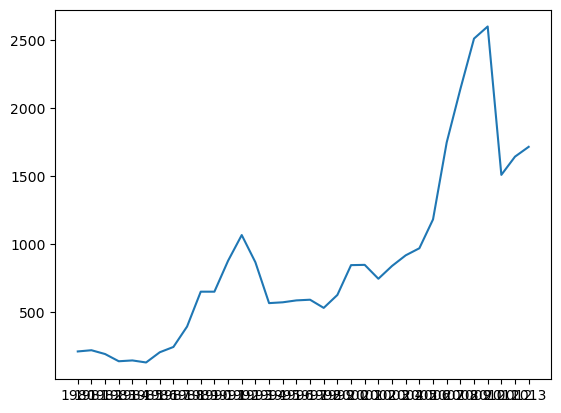

In [16]:
# o metodo plot() do matplotlib permite gerar graficos de linhas e recebe como parametros os eixos x e y
plt.plot(df_brasil['ano'], df_brasil['imigrantes'])

([<matplotlib.axis.YTick at 0x7f39ab16a110>,
 [Text(0, 500, '500'),
  Text(0, 100, '100'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000')])

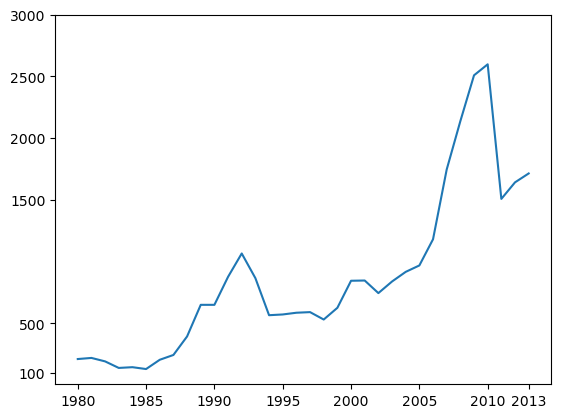

In [19]:
# Adicionando titulo e legendas ao grafico e ajustando os itens do graico
plt.plot(df_brasil['ano'], df_brasil['imigrantes'])
# ajustando a legenda do exio x com amostragem espaçada de 5 anos
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
# ajustando a legenda do exio y com amostragem espaçada de 5 anos
plt.yticks([500,100,1500,2000,2500,3000])


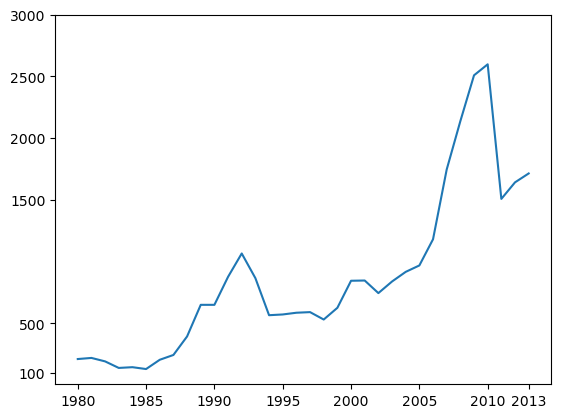

In [21]:
# metodo show() exibe o grafico sem as informacoes adicionais
plt.plot(df_brasil['ano'], df_brasil['imigrantes'])
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
plt.yticks([500,100,1500,2000,2500,3000])
plt.show()

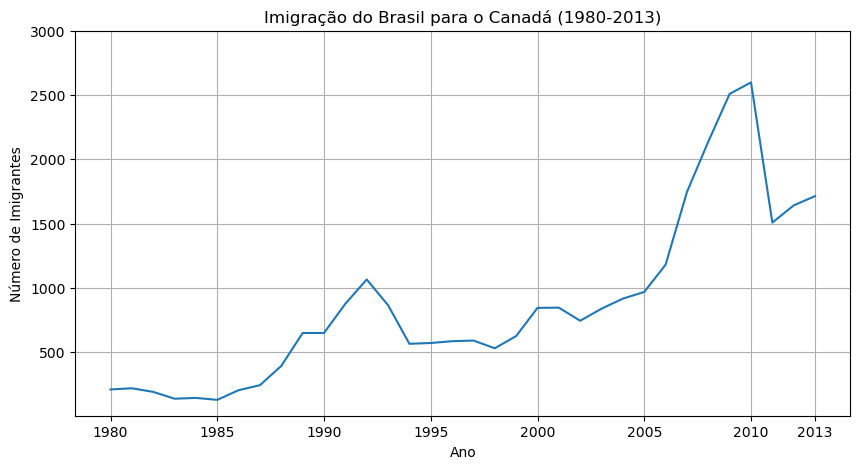

In [22]:
# Alterando o tamanho do grafico
plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico
plt.plot(df_brasil['ano'], df_brasil['imigrantes'])
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
plt.yticks([500,1000,1500,2000,2500,3000])
# Adicionando título e rótulos aos eixos
plt.title('Imigração do Brasil para o Canadá (1980-2013)')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()

In [23]:
# adicionando dados de outros paises ao grafico
df_compara = df.loc[['Brasil', 'Argentina', 'Chile'], anos]
df_compara.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
País,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Chile,1233,1069,1078,781,681,533,633,1454,990,1023,...,383,384,427,530,350,375,340,174,291,273


In [26]:
# É gerado uma linha para cada pais e colunas 'ano' contendo o numero de imigrantes
# É conveniente transpor o DataFrame para facilitar a visualização
df_compara = df_compara.T
df_compara.head()

País,Brasil,Argentina,Chile
1980,211,368,1233
1981,220,426,1069
1982,192,626,1078
1983,139,241,781
1984,145,237,681


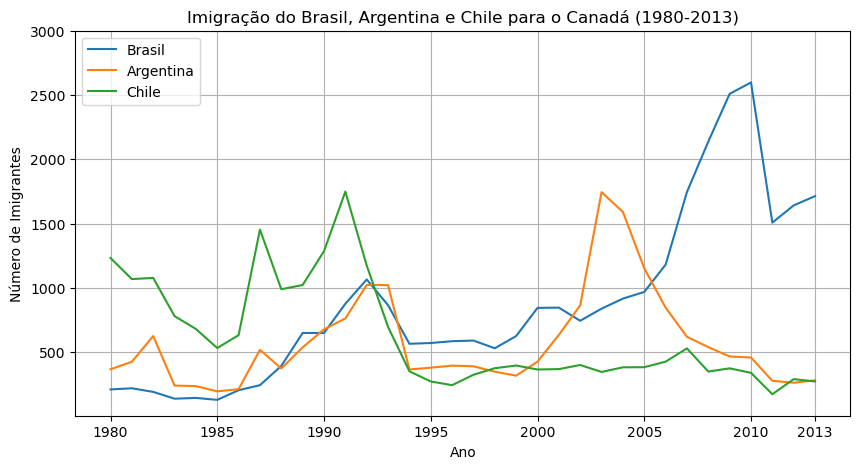

In [27]:
# Gerando o grafico com os dados de varios paises
plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico
plt.plot(df_compara.index, df_compara['Brasil'], label='Brasil')
plt.plot(df_compara.index, df_compara['Argentina'], label='Argentina')
plt.plot(df_compara.index, df_compara['Chile'], label='Chile')
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
plt.yticks([500,1000,1500,2000,2500,3000])
# Adicionando título e rótulos aos eixos
plt.title('Imigração do Brasil, Argentina e Chile para o Canadá (1980-2013)')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.legend()  # Adiciona a legenda para identificar as linhas
plt.show()

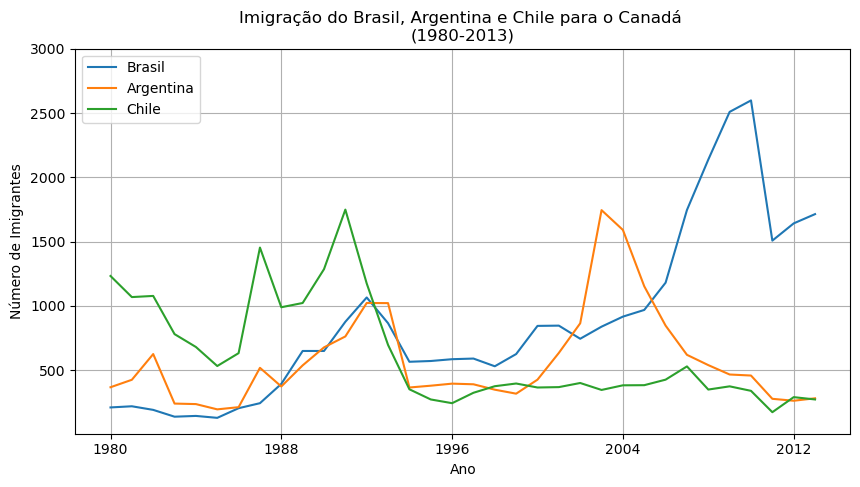

In [31]:
# Criar figuras e eixos para o gráfico
fig, ax = plt.subplots(figsize=(10, 5))  # Cria uma figura e um eixo
# Plotar os dados de imigração
ax.plot(df_compara.index, df_compara['Brasil'], label='Brasil')
ax.plot(df_compara.index, df_compara['Argentina'], label='Argentina')
ax.plot(df_compara.index, df_compara['Chile'], label='Chile')
# Configurar os rótulos dos eixos e o título
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Define o número máximo de rótulos no eixo x
#ax.set_xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
ax.set_yticks([500,1000,1500,2000,2500,3000])
ax.set_title('Imigração do Brasil, Argentina e Chile para o Canadá \n(1980-2013)') # \n adiciona uma quebra de linha no título
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Imigrantes')
# Adicionar uma grade ao gráfico
ax.grid(True)  # Adiciona uma grade ao gráfico
# Adicionar a legenda para identificar as linhas
ax.legend()  # Adiciona a legenda para identificar as linhas
# Exibir o gráfico
plt.show()

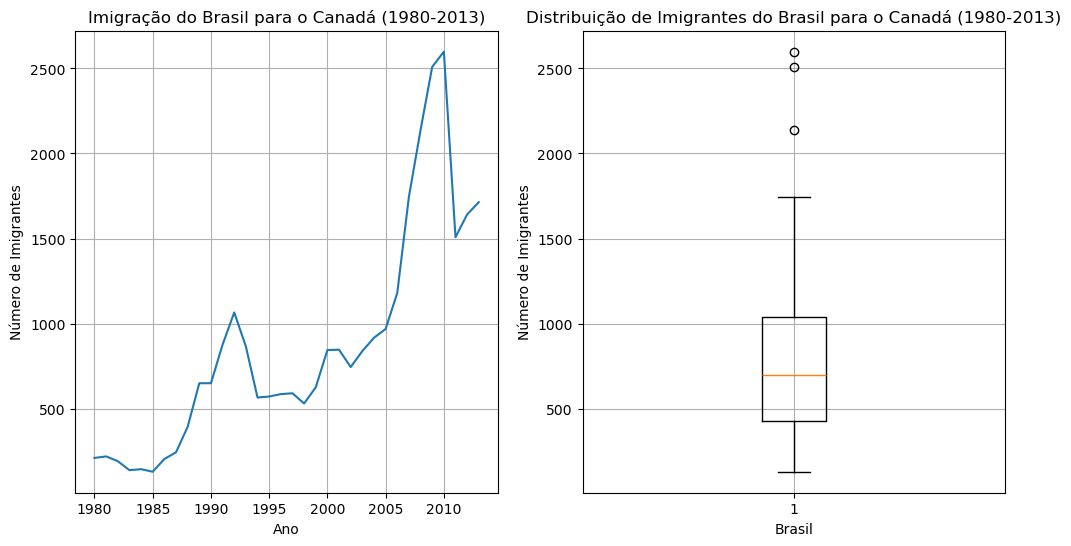

In [39]:
# utilizando detalhamento de informações do matplotlib
# boxplot
fig, axs = plt.subplots(1,2, figsize=(12, 6))  # Cria uma figura com 1 linha e 2 colunas de subplots (2 figuras na mesma linha)
# Boxplot para o Brasil
axs[0].plot(df_brasil['ano'], df_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá (1980-2013)')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Imigrantes')
axs[0].grid(True)
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5)) # Define o espaçamento dos rótulos do eixo x a cada 5 anos
# Boxplot para o brasil
axs[1].boxplot(df_brasil['imigrantes'])  # Cria um boxplot horizontal
axs[1].set_title('Distribuição de Imigrantes do Brasil para o Canadá (1980-2013)')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de Imigrantes')
axs[1].grid(True)
plt.show()

In [40]:
# Obter os dados numericos de imigração do Brasil
df_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


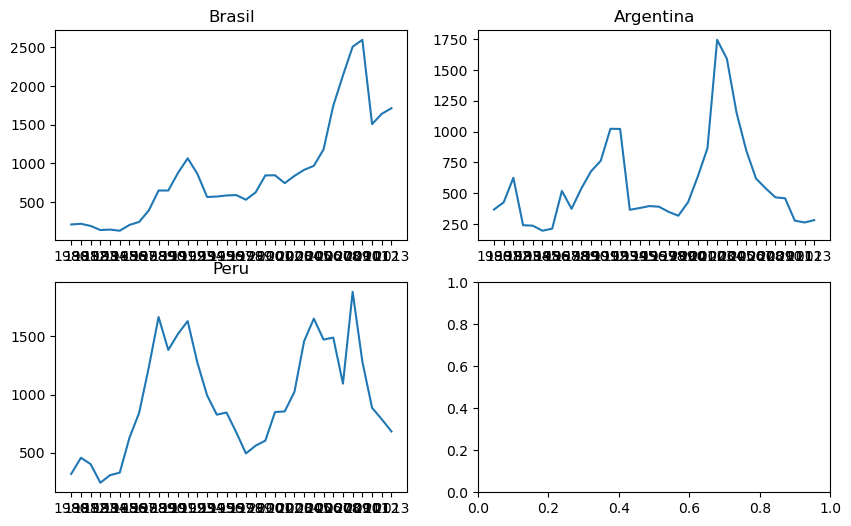

In [41]:
# utilizando multiplos subplots para comparar os paises
fig, axs = plt.subplots(2,2, figsize=(10, 6))

# Plotar os dados de imigração do Brasil
axs[0,0].plot(df.loc['Brasil', anos]) # Seleciona a linha do Brasil e os anos no dataframe inicial
axs[0,0].set_title('Brasil')
# Plotar os dados de imigração da Argentina
axs[0,1].plot(df.loc['Argentina', anos])
axs[0,1].set_title('Argentina')
# Plotar os dados de imigração do Peru
axs[1,0].plot(df.loc['Peru', anos])
axs[1,0].set_title('Peru')
# Plotar os dados de imigração do Chile
plt.show()

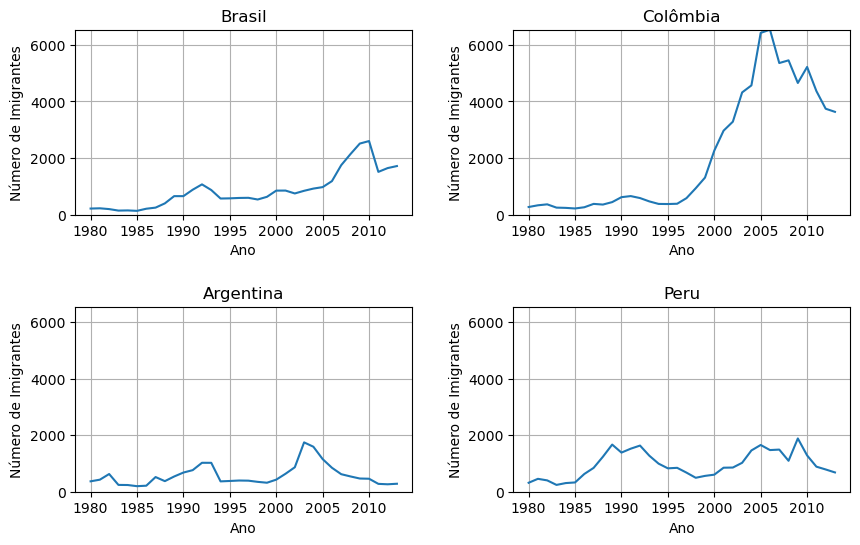

In [49]:
# Ajustando o espaçãmento entre os subplots
fig, axs = plt.subplots(2,2, figsize=(10, 6))
# Ajustando o espaçamento entre os subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace controla o espaçamento vertical, wspace controla o espaçamento horizontal

# Plotar os dados de imigração do Brasil
axs[0,0].plot(df.loc['Brasil', anos]) # Seleciona a linha do Brasil e os anos no dataframe inicial
axs[0,0].set_title('Brasil')
# Plotar os dados de imigração do Colombia
axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')
# Plotar os dados de imigração da Argentina
axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')
# Plotar os dados de imigração do Peru
axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat: # Itera sobre todos os eixos
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))  # Define os rótulos do eixo x

    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de Imigrantes')
    ax.grid(True)  # Adiciona uma grade ao gráfico

ymin = 0
ymax = df.loc[['Brasil', 'Argentina', 'Chile', 'Peru', 'Colômbia'], anos].max().max()  # Obtém o valor máximo de imigrantes para definir o limite do eixo y
for ax in axs.ravel():
    ax.set_ylim(ymin,ymax)
# Plotar os dados de imigração do Chile
plt.show()

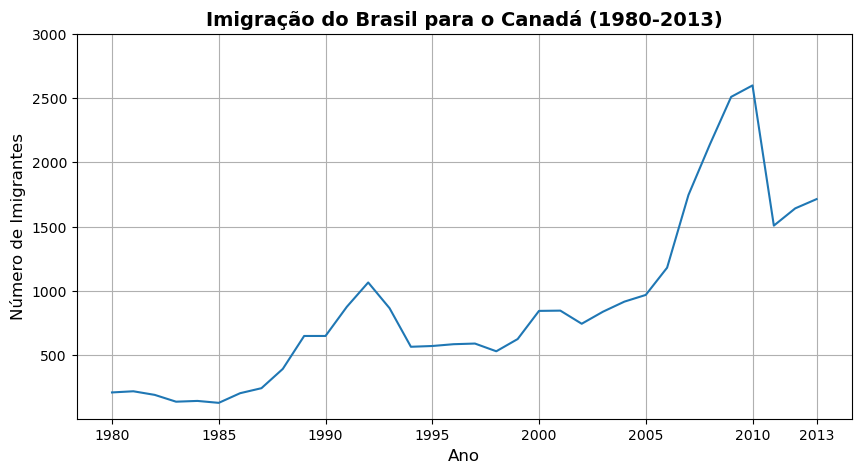

In [50]:
# Adicionando itens visuais ao gráfico
# Alterando o tamanho do grafico
plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico
plt.plot(df_brasil['ano'], df_brasil['imigrantes'])
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
plt.yticks([500,1000,1500,2000,2500,3000])
# Adicionando título e rótulos aos eixos
plt.title('Imigração do Brasil para o Canadá (1980-2013)', fontsize=14, fontweight='bold')  # Define o título com tamanho e peso da fonte
plt.xlabel('Ano', fontsize=12)  # Define o rótulo do eixo x com tamanho da fonte
plt.ylabel('Número de Imigrantes', fontsize=12)  # Define o rótulo do eixo y com tamanho da fonte
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()

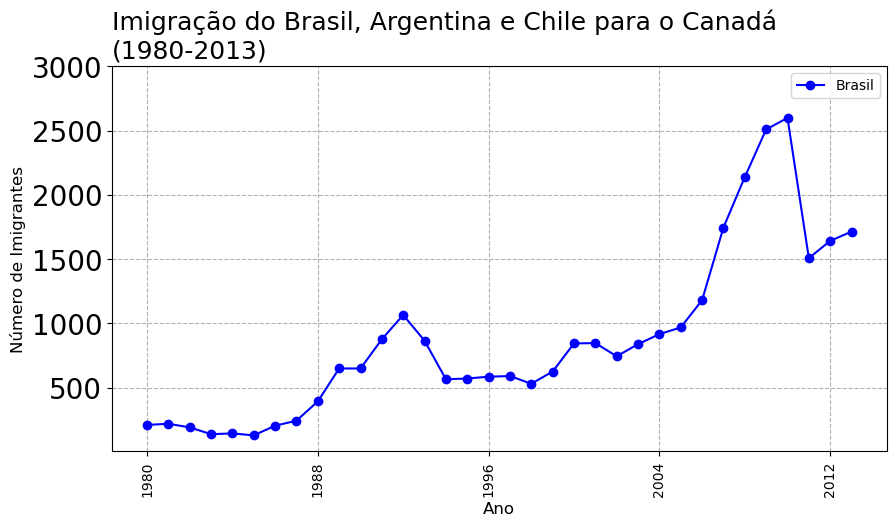

In [59]:
# Adicionando itens visuais ao sub gráfico
# Criar figuras e eixos para o gráfico
fig, ax = plt.subplots(figsize=(10, 5))  # Cria uma figura e um eixo
# Plotar os dados de imigração
ax.plot(df_compara.index, df_compara['Brasil'], label='Brasil', color='blue', linestyle='-', marker='o')  # Adiciona cor, estilo de linha e marcador
# Configurar os rótulos dos eixos e o título
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Define o número máximo de rótulos no eixo x
#ax.set_xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
ax.set_yticks([500,1000,1500,2000,2500,3000])
# formatando os ticks do eixos
ax.xaxis.set_tick_params(labelrotation=90, labelsize=10)  # Rotaciona os rótulos do eixo x em 90 graus e define o tamanho da fonte
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Imigração do Brasil, Argentina e Chile para o Canadá \n(1980-2013)', fontsize=18, loc='left') # \n adiciona uma quebra de linha no título
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Imigrantes', fontsize=12)

# Adicionar uma grade ao gráfico
ax.grid(linestyle='--')  # Adiciona uma grade ao gráfico
# Adicionar a legenda para identificar as linhas
ax.legend()  # Adiciona a legenda para identificar as linhas
# Exibir o gráfico
plt.show()

In [65]:
# Listando os estilos disponíveis no matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [62]:
IPython_default = plt.rcParams.copy() # Salva os parâmetros padrão do matplotlib
plt.style.use('fivethirtyeight') # Define o estilo 'fivethirtyeight' do matplotlib


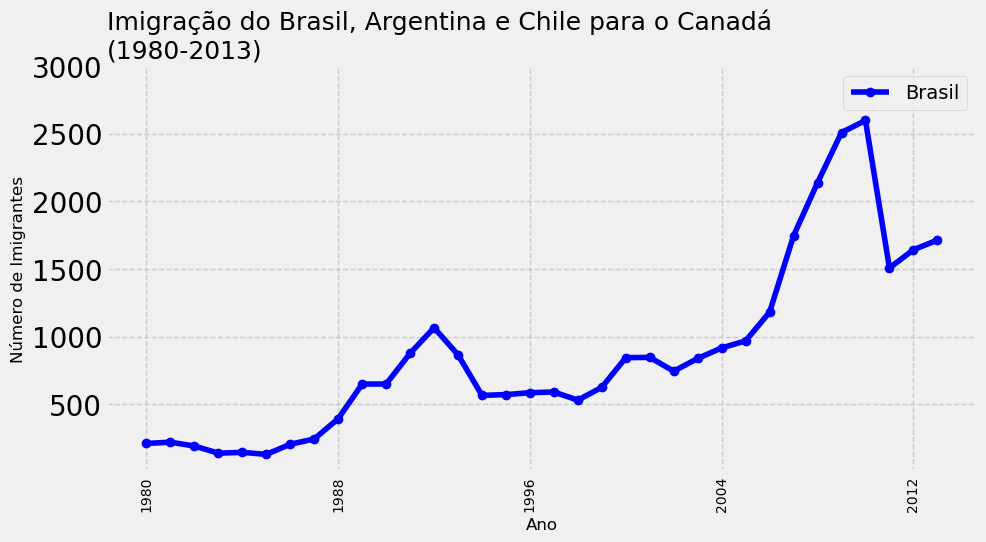

In [64]:
# Adicionando itens visuais ao sub gráfico
with plt.style.context('fivethirtyeight'): # Utilizando o estilo 'fivethirtyeight' do matplotlib
    # Criar figuras e eixos para o gráfico
    fig, ax = plt.subplots(figsize=(10, 5))  # Cria uma figura e um eixo
    # Plotar os dados de imigração
    ax.plot(df_compara.index, df_compara['Brasil'], label='Brasil', color='blue', linestyle='-', marker='o')  # Adiciona cor, estilo de linha e marcador
    # Configurar os rótulos dos eixos e o título
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Define o número máximo de rótulos no eixo x
    #ax.set_xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2013'])
    ax.set_yticks([500,1000,1500,2000,2500,3000])
    # formatando os ticks do eixos
    ax.xaxis.set_tick_params(labelrotation=90, labelsize=10)  # Rotaciona os rótulos do eixo x em 90 graus e define o tamanho da fonte
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_title('Imigração do Brasil, Argentina e Chile para o Canadá \n(1980-2013)', fontsize=18, loc='left') # \n adiciona uma quebra de linha no título
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Número de Imigrantes', fontsize=12)

    # Adicionar uma grade ao gráfico
    ax.grid(linestyle='--')  # Adiciona uma grade ao gráfico
    # Adicionar a legenda para identificar as linhas
    ax.legend()  # Adiciona a legenda para identificar as linhas
    # Exibir o gráfico
    plt.show()